# Mapping subtypes to clusters using drivers (Figure 4)

In [1]:
from __future__ import division
import sys
import random
import copy
import math
import json

import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

sys.path.append("../resources/")
import sct
reload(sct)

sns.set_style("ticks")
sns.set_context("talk")

output_dir = "out/"
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format)
    return None

mpl.rc('savefig', dpi=300)

pd.options.mode.chained_assignment = None  # default='warn'

# Load data

In [2]:
df_logCPM_all = pd.read_csv("../data/htseq_logCPM_hq.tab.gz", sep="\t", header=0, index_col=0) # CPM
df_libs = pd.read_csv("../data/libs.csv", sep=",", header=0, index_col=0) # sample info

# Filter for cells in Figure 4 (GH146, NP5103)

In [3]:
# Load names of high quality neurons (4/5 markers)
names_hq_neurons = []
with open("../data/names_hq_neurons.txt") as f:
    for line in f:
        names_hq_neurons.append(line.rstrip())
        
# Load names of contaminating neurons (vPN, APL)
names_vPN = []
with open("../data/names_vPN.txt") as f:
    for line in f:
        names_vPN.append(line.rstrip())
        
names_APL = []
with open("../data/names_APL.txt") as f:
    for line in f:
        names_APL.append(line.rstrip())

# Get names of neurons, astrocytes
selector = ((df_libs["genotype"] == "GH146-GFP") &
            (df_libs["num_cells"] == 1))
names_GH146 = [x for x in list(df_logCPM_all.columns) if x in df_libs.loc[selector].index and
                                                             x in names_hq_neurons and 
                                                             x not in names_vPN and 
                                                             x not in names_APL]
print "GH146", len(names_GH146)

GH146 902


In [6]:
# Identify NP5103-GFP cells expressing trol
selector = ((df_libs["genotype"] == "NP5103-GFP") &
            (df_libs["num_cells"] == 1))
names_NP5103 = [x for x in list(df_logCPM_all.columns) if x in df_libs.loc[selector].index and
                                                          x in names_hq_neurons and 
                                                          x not in names_vPN and 
                                                          x not in names_APL]
print "NP5103", len(names_NP5103)

names_NP5103_trol = list(df_logCPM_all[names_NP5103].columns[np.where(df_logCPM_all[names_NP5103].loc["trol"] > 3)])

print "NP5103 trol+", len(names_NP5103_trol)

# Filter for these cells
names_genotypes = names_GH146 + names_NP5103_trol
df = df_logCPM_all[list(names_genotypes)]
print "Number of cells", len(names_genotypes)

# Display number of cells of each genotype
df_libs.loc[df.columns]["genotype"].value_counts()

NP5103 41
NP5103 trol+ 28
Number of cells 930


GH146-GFP     902
NP5103-GFP     28
Name: genotype, dtype: int64

# Load genes found by ICIM

In [8]:
genes_GH146_ICIM = []
with open("../data/genes_GH146_ICIM.txt") as f:
    for line in f:
        genes_GH146_ICIM.append(line.rstrip())

# Display cells using ICIM/TSNE

In [9]:
# Subset data to genes desired
Y = df.loc[genes_GH146_ICIM]

# Calculate TSNE
reload(sct)
from sklearn.manifold import TSNE
myTSNE = sct.TSNE(Y, df, df_libs)
myTSNE.calc_TSNE(perplexity=15, learning_rate=1000)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 930 / 930
[t-SNE] Mean sigma: 0.148874
[t-SNE] Iteration 25: error = 1.6414626, gradient norm = 0.0293787
[t-SNE] Iteration 50: error = 1.5892161, gradient norm = 0.0263334
[t-SNE] Iteration 75: error = 1.0859858, gradient norm = 0.0199380
[t-SNE] Iteration 100: error = 1.0621974, gradient norm = 0.0180236
[t-SNE] Error after 100 iterations with early exaggeration: 1.062197
[t-SNE] Iteration 125: error = 0.8870648, gradient norm = 0.0157357
[t-SNE] Iteration 150: error = 0.9618844, gradient norm = 0.0156718
[t-SNE] Iteration 175: error = 0.9911267, gradient norm = 0.0153412
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.991127


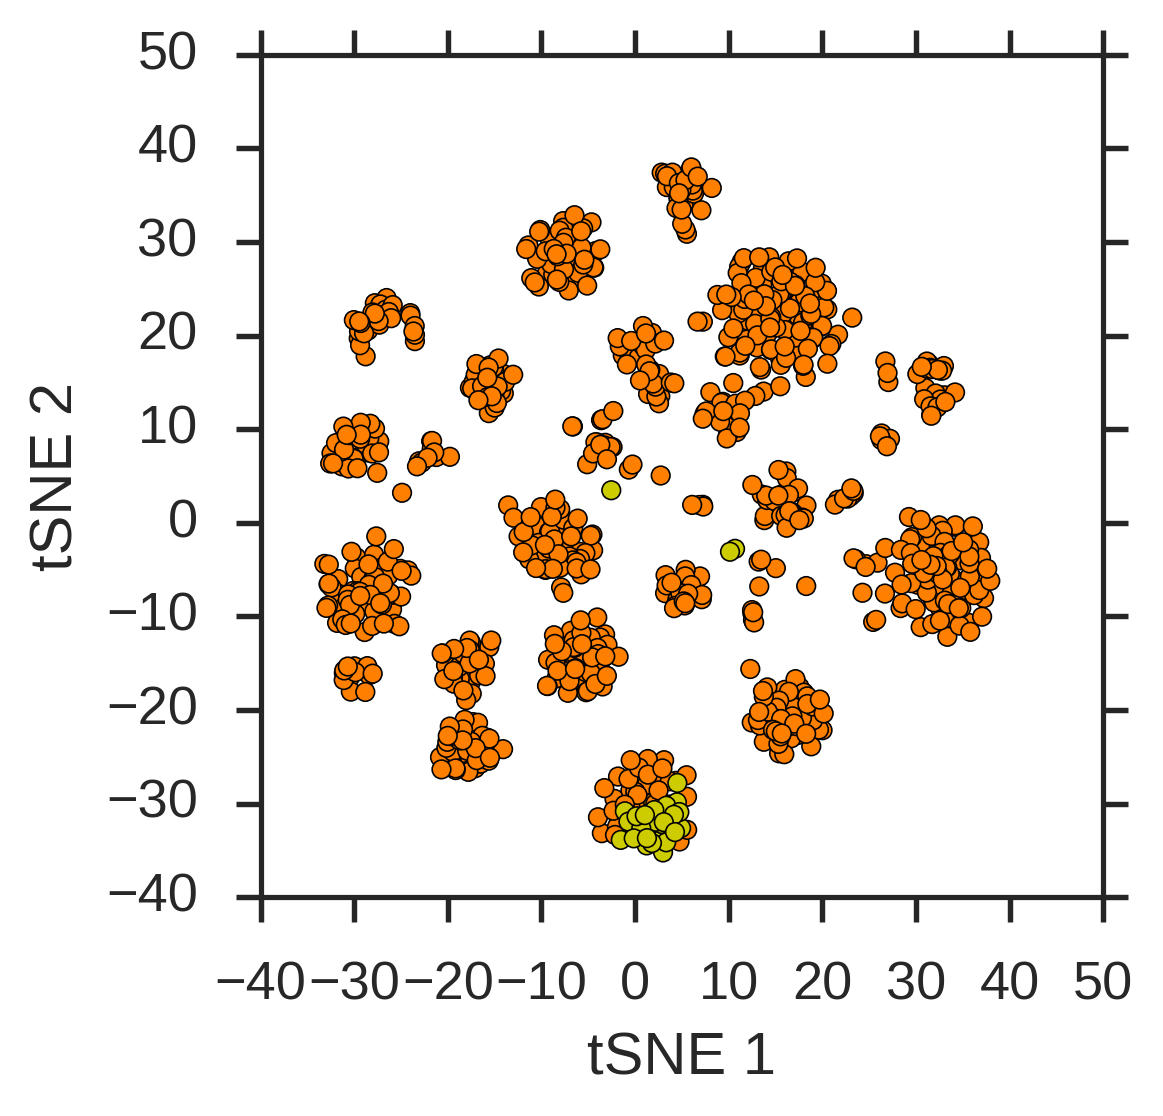

In [10]:
# Plot TSNE colored by genotype
fig, ax = plt.subplots(1, 1, figsize=(6,4))
myTSNE.plot(fig, ax, colorMode="genotype")

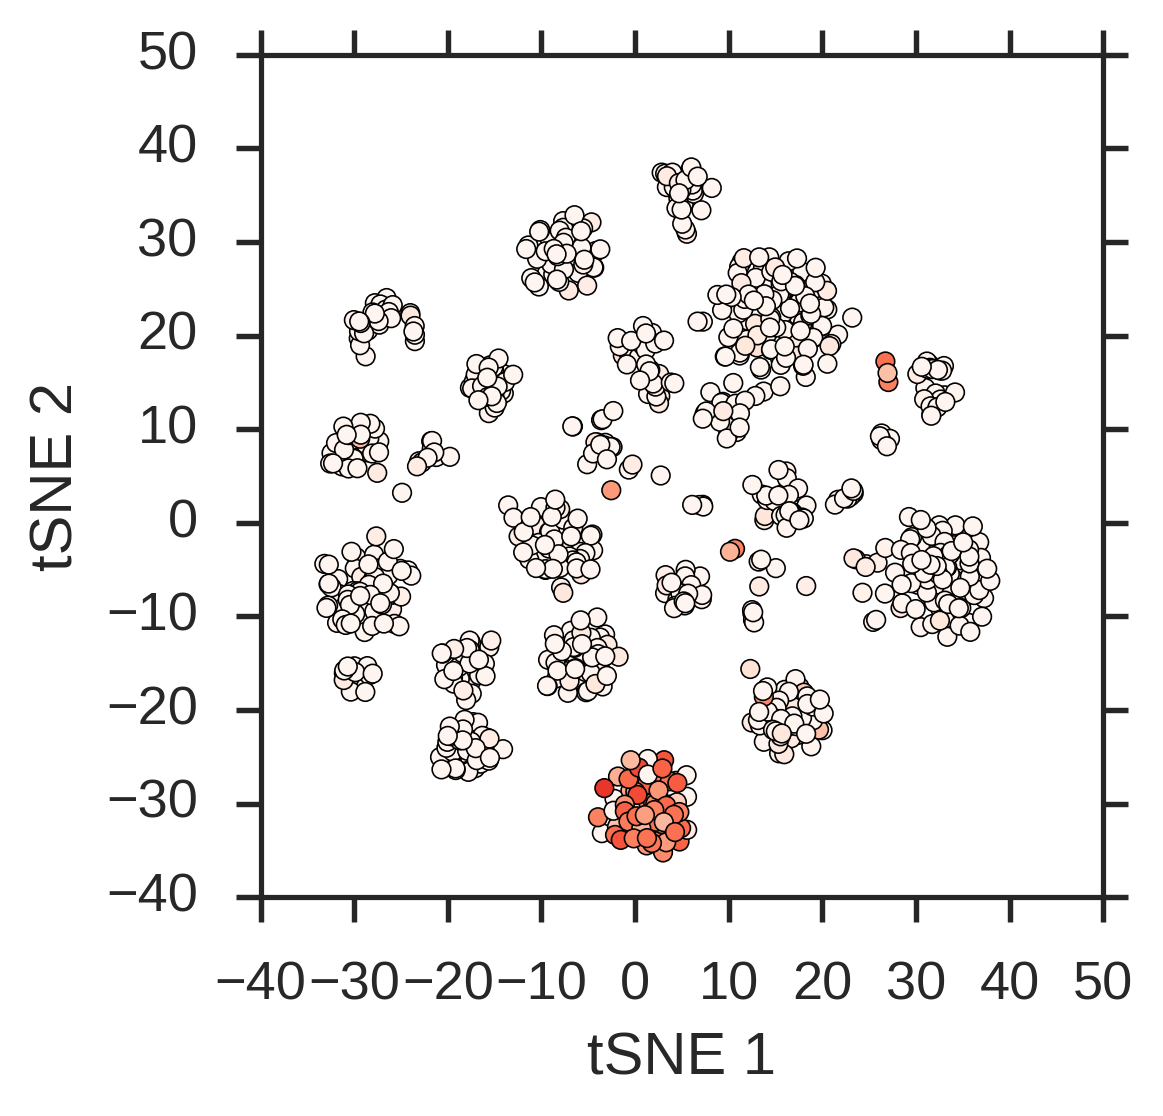

In [11]:
# Plot TSNE
fig, ax = plt.subplots(1, 1, figsize=(6,4))
myTSNE.plot(fig, ax, colorBy="trol", cmap="Reds")